Name- Mohit Ram Sharma, Roll - 224161018

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import cm
from sklearn.model_selection import train_test_split

# Problem 1

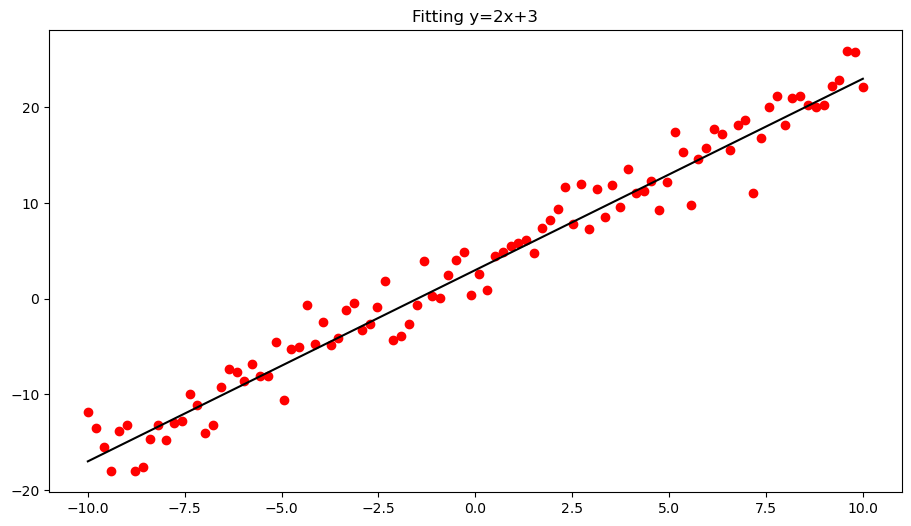

In [2]:
# 1(a)
a=2
b=3
# 1(b)
n=100
x=np.linspace(-10,10,n)
# 1(c)
y_hat=a*x+b

# 1(d)
plt.figure(figsize=(11,6))
plt.plot(x,y_hat,color='black')

# 1(e)
sigma=2
noise=np.random.randn(n)
y=y_hat+sigma*noise

# 1(f)
plt.scatter(x,y,color='red')
plt.title('Fitting y=2x+3')

plt.show()

# Problem 2

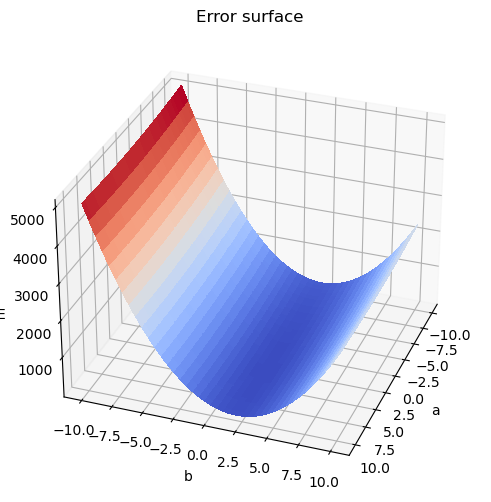

In [3]:
a=np.arange(-10,10.1,0.1)
b=np.arange(-10,10.1,0.1)
E=np.zeros((len(a),len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    y_hat=a[i]*x+b[j]
    e=y-y_hat
    error=(e**2).mean()
    E[i][j]+=error
a,b = np.meshgrid(a,b)
fig=plt.figure(figsize=(8,6)) 
ax = plt.axes(projection='3d')
ax.plot_surface(a,b,E, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.view_init(30,20)
ax.set_title('Error surface')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')
plt.show()

# Problem 3

In [4]:
a=2
b=3
n=200
x=np.linspace(-10,10,n)
y_hat=a*x+b
noise=np.random.randn(n)

def pseudo_inverse_soln(sigma):
  '''
  Returns parameters value using pseudo inverse approach.
  Also returns Mean square error and R-squared values for the model.
  '''

  y=y_hat+sigma*noise

  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
  Y=np.array(y_train)
  Y=Y.reshape(-1,1)
  X=np.array(x_train)
  X=X.reshape(-1,1)
  A = np.concatenate((np.ones((len(X),1)),X),axis=1)
  P=np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),Y))
  a=P[1]
  b=P[0]

  print("Value of 'a' using pseudoinverse is a =", a)
  print("Value of 'b' using pseudoinverse is b =", b)

  y_prediction=a*x_test+b

  print("Mean squared error is " ,mean_squared_error(y_test,y_prediction))
  print("R2 Score is ",r2_score(y_test,y_prediction))

Experimenting with different values of sigma

### sigma = 2

In [5]:
sigma=2
pseudo_inverse_soln(sigma)

Value of 'a' using pseudoinverse is a = [1.99874669]
Value of 'b' using pseudoinverse is b = [2.85721197]
Mean squared error is  3.104799638827933
R2 Score is  0.9778269804491424


### sigma=5

In [6]:
sigma=5
pseudo_inverse_soln(sigma)

Value of 'a' using pseudoinverse is a = [1.99686672]
Value of 'b' using pseudoinverse is b = [2.64302993]
Mean squared error is  19.40499774267459
R2 Score is  0.8777668384545634


### sigma = 0.5

In [7]:
sigma=0.5
pseudo_inverse_soln(sigma)

Value of 'a' using pseudoinverse is a = [1.99968667]
Value of 'b' using pseudoinverse is b = [2.96430299]
Mean squared error is  0.19404997742674573
R2 Score is  0.9985718863724646


## Observation :  
As the σ value increases, the points are not near to the line, and the MSE increases and the R2 Score decreases.  
As the σ value decreases, the points are nearer to the line, and the MSE decreases and the R2 Score increases

# Problem 4

In [12]:
a=2
b=3
n=100
x=np.linspace(-10,10,n)
y_hat=a*x+b
noise=np.random.randn(n)
sigma=2
y=y_hat+sigma*noise

In [13]:
def gradient_descent_simple_linear_regression(x,y,a,b,eta,iter):
  '''
  Perform gradient descent algorithm p=p-eta*gradient
  Hypotheses function y=ax+b
  p is the column vector(numpy array of shape (2,1)) containing the parameters 
  a and b and initial value of parameters and is of the form 
  p=np.array([[a],[b]])
  iter = number of iterations
  '''
  p=np.array([[a],[b]])
  all_p=np.zeros((2,iter+1))
  all_p[:,0]=p[:,0]
  for i in range(iter):
    grad_a=(-2/n)*(((y-p[0,0]*x-p[1,0])*x).sum())
    grad_b=(-2/n)*(((y-p[0,0]*x-p[1,0])).sum())
    grad=np.array([[grad_a],[grad_b]])
    p=p-eta*grad
    all_p[:,i+1]=p[:,0]
  print(f"Final solution after {iter} iterations : a= {p[0,0]}, b={p[1,0]}")
  return p,all_p

In [14]:
def plot_trajectory(all_p):
  '''
  Plot the trajectory of the points obtained in gradient descent algorithm on 
  the contour plot of the error surface on (a,b) plane
  '''
  a_axis_width=abs(2-all_p[0,:]).max()+0.2
  b_axis_width=abs(3-all_p[1,:]).max()+0.2
  a_axis=np.linspace(2-a_axis_width,2+a_axis_width,101)
  b_axis=np.linspace(3-b_axis_width,3+b_axis_width,101)
  # Calculating Error
  E=np.zeros((len(a_axis),len(b_axis)))
  for i in range(len(a_axis)):
    for j in range(len(b_axis)):
      y_hat=a_axis[i]*x+b_axis[j]
      e=y-y_hat
      error=(e**2).mean()
      E[i][j]+=error
  a_axis,b_axis = np.meshgrid(a_axis,b_axis)
  fig=plt.figure(figsize=(8,6)) 
  ax = plt.axes()
  ax.contourf(a_axis,b_axis,E)
  ax.plot(all_p[0,:],all_p[1,:],color='red',)
  ax.set_title('Trajectory of the solution obtained via gradient descent')
  ax.set_xlabel('a')
  ax.set_ylabel('b')
  plt.show()

## a=0.5,b=1,eta(η)=0.01

In [15]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,0.5,1,0.02,100)

Final solution after 100 iterations : a= 2.0385540639518402, b=3.1892380065484383


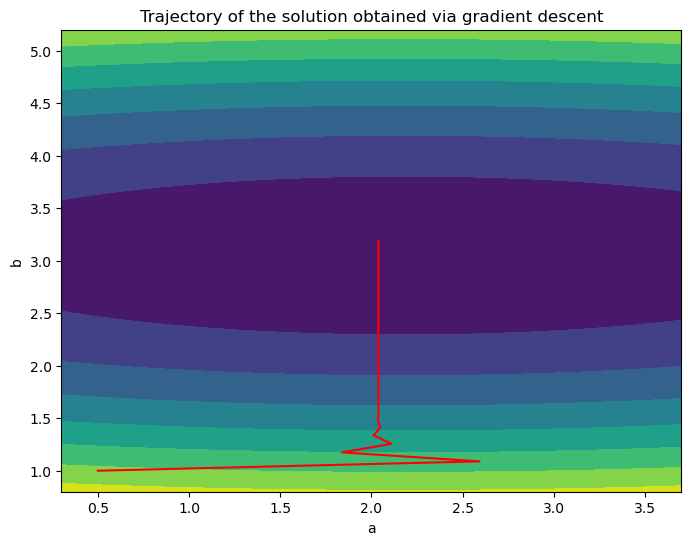

In [16]:
plot_trajectory(all_p)

## a = 3, b = 1, eta(η) = 0.02

In [17]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,3,1,0.02,100)

Final solution after 100 iterations : a= 2.0385540639518407, b=3.1892380065484383


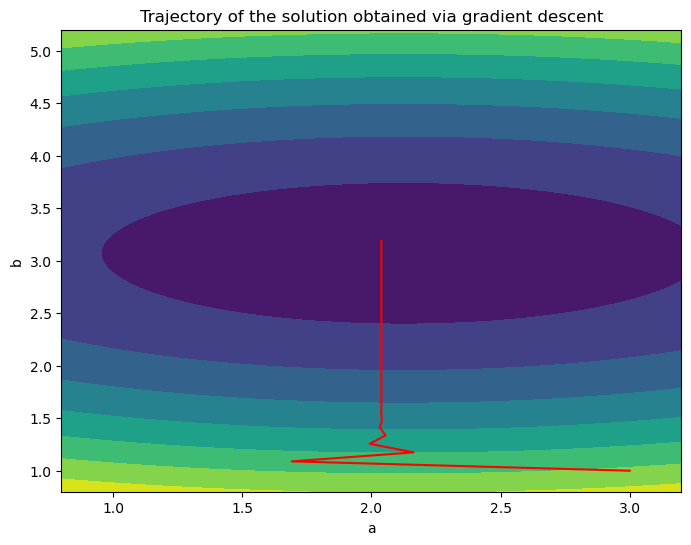

In [18]:
plot_trajectory(all_p)

## a = 1, b = 4.5, η = 0.03 ( Increasing η)

In [19]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,1,4.5,0.03,100)

Final solution after 100 iterations : a= -52.491021868831346, b=3.2294211730967914


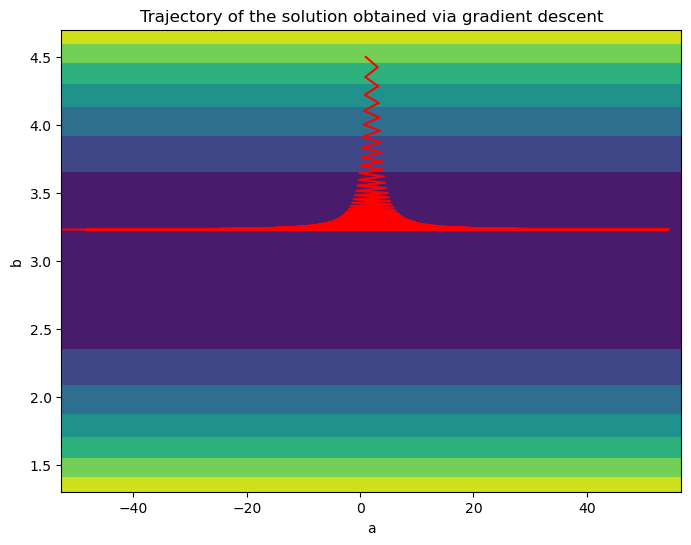

In [20]:

plot_trajectory(all_p)

Increasing η value to 0.03 resulted in non-convergence of the parameter a. The parameter b came close to 3, but the value of a is oscillating.

## a = 2, b = 10, η = 0.02 ( Intial b value is far )

In [21]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,2,100,0.02,100)

Final solution after 100 iterations : a= 2.0385540639518402, b=4.859399623074551


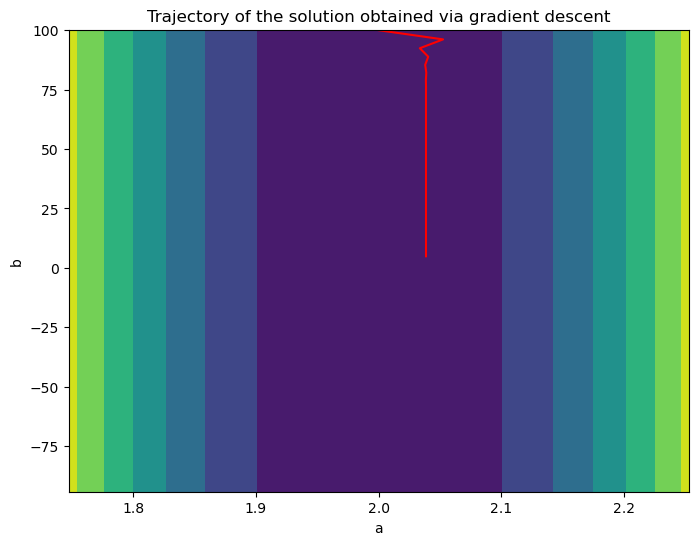

In [22]:
plot_trajectory(all_p)

Even if the starting b-value is far from the original value, the b-value in iterations do converge(come near) to 3 but more than 100 iterations(atleast 150) are required

## a = 5, b = 10, η = 0.02 ( Intial a value is far )

In [23]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,500,10,0.02,100)

Final solution after 100 iterations : a= 2.0385540639518407, b=3.3410708807780845


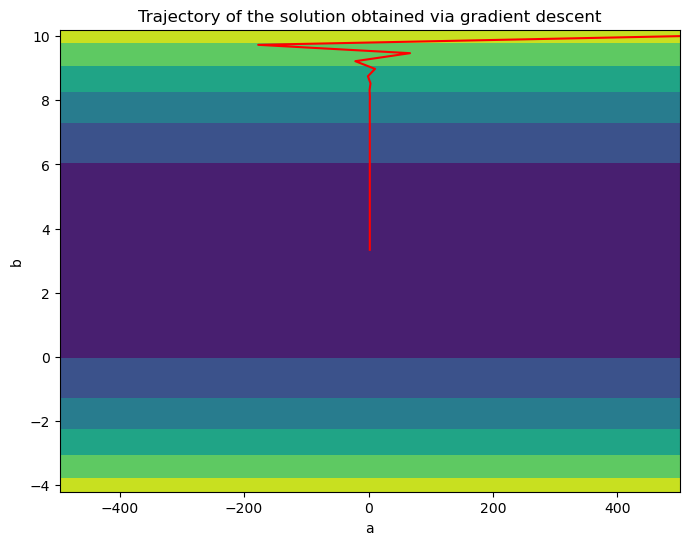

In [24]:
plot_trajectory(all_p)

If the initial value of 'a' is far then also with optimal η, our iterations converge to the original values in 100 iterations.

## a = 1.5, b = 3.5, η = 0.001 ( small eta)

In [25]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,1,3.5,0.001,100)

Final solution after 100 iterations : a= 2.037647511876919, b=3.450433343082956


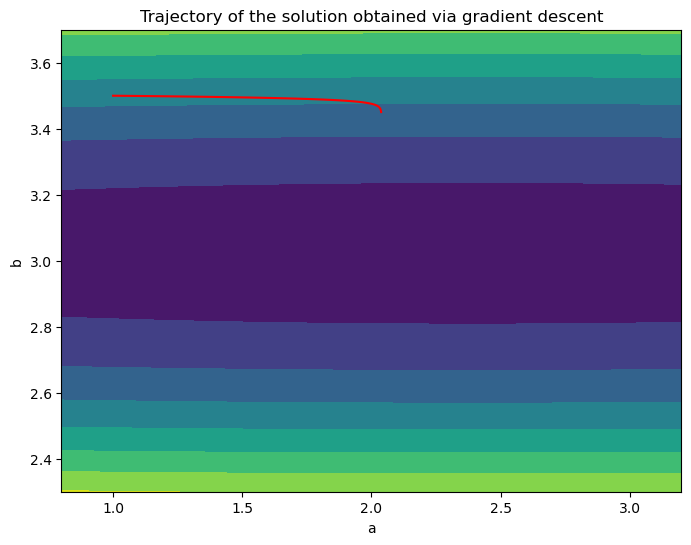

In [26]:
plot_trajectory(all_p)

If the η value is too small then the iterations are not able to converge in 100 iterations

## a = 1, b = 4.5, η = 0.05 (large eta)

In [27]:
(p,all_p)=gradient_descent_simple_linear_regression(x,y,1,4.5,0.05,100)

Final solution after 100 iterations : a= -1.1213396089796858e+38, b=4.7488778094683875e+20


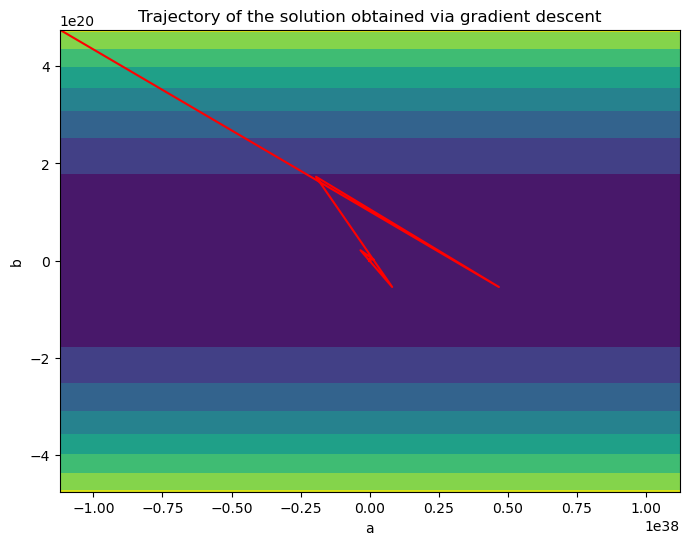

In [28]:
plot_trajectory(all_p)

The η value of 0.05 resulted in divergence of the iterations

## Conclusion
* Whether the iterations will converge or not heavily depends on our starting point and the value of η.  
    1. If η is too small to start with, it will take higher number of iterations for convergence.
    2. If η is too large it may result is oscillation or divergence of the parameters.
* If our starting 'a' or 'b' value is far from original values a=2,b=3 then sometimes a little more than 100 iterations are required for convergence.